### REGRESSION LINEAIRE
#### 1. Elaborer des modèles de régression linaire pour prédire la variable (target) alive. En sélectionnant comme variables explicatives (features):
###### a. age, sex, class, fare prises individuellement
###### b. age, sex, class, fare
###### c. différentes combinaisons de age, sex, class, fare
###### d. ayant une forte corrélation avec la variable alive
#### 2. Evaluer chaque modèle de régression.
#### 3. Conclure. 

-----------------------------------------------------------------------------------------------------------------

### Importer les librairies

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importer la  le dataset et explorer

In [3]:
data = pd.read_csv('trainClean.csv', sep=',', encoding='utf-8')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
PassengerId       889 non-null int64
Survived          889 non-null int64
Pclass            889 non-null int64
Name              889 non-null object
Sex               889 non-null object
Age               889 non-null float64
SibSp             889 non-null int64
Parch             889 non-null int64
Ticket            889 non-null object
Fare              889 non-null float64
Embarked          889 non-null object
Age_categories    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


### Création d'un train set et validation set


In [9]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
print(X_train.shape,'\n')
print(X_valid.shape,'\n')
print(y_train.shape,'\n')
print(y_valid.shape,'\n')

(711, 11) 

(178, 11) 

(711,) 

(178,) 



### A. En utilisant chaque variable individuellement.
##### En fonction de l'âge

In [14]:
X_train1 = X_train['Age'].values.reshape(-1,1)
X_valid1 = X_valid['Age'].values.reshape(-1,1)
X_train1.shape
#X_valid1.shape

(711, 1)

In [15]:
model = LinearRegression()
model.fit(X_train1,y_train)
import numpy as np
print(model.intercept_)
print(model.coef_)

0.5062670037523589
[-0.00379173]


R² : -0.03523409415143064
RMSE : 0.47895947319942017


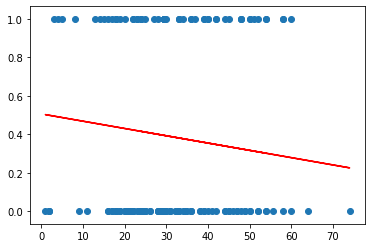

In [17]:
#calcul du R²
print("R² :", model.score(X_valid1,y_valid))

RMSE=np.sqrt(((y_valid-model.predict(X_valid1))**2).sum()/len(y_valid))
print("RMSE :", RMSE)


# Visualisation
plt.scatter(X_valid1,y_valid)
plt.plot(X_valid1,model.predict(X_valid1),c='red')
plt.show()